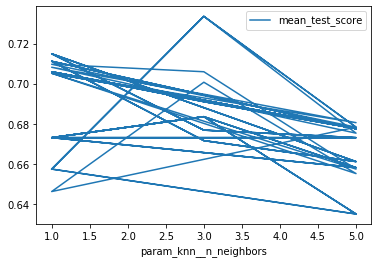

In [204]:
knn_metric_df = knn_df[knn_df['param_knn__p'] == 1]
knn_metric_df.plot(x='param_knn__n_neighbors', y='mean_test_score');

### Column for if post contains `selftext` called  `has_selftext`

In [450]:
df["selftext"].isna().sum()

df["has_selftext"] = df["selftext"].notnull().astype(int)

print((df["has_selftext"] == 1).sum())

print((df["has_selftext"] == 0).sum())

909
91


### Clean the selftext:

- Not every subreddit post has `selftext`, which is the body of a post.
    - It seems clear that most of the text context of the subreddits are contained in the `title` field, making it an important `predictor` variable.
- Issues with `selftext`:
    - `[removed]`
        - These will be left in for this model.
    - `[deleted]`
        - These will be left in for this model.
    - Contains emojis
    - NaN
        - Every collection of 500 posts seems to have just under 10% of posts have missing values for the `selftext` field

In [451]:
print((df["selftext"] == "[removed]").sum())
removed_selftext = (df["selftext"] == "[removed]").sum()
print(f"Percent [removed]: {(removed_selftext / len(df)) * 100}%")

print((df["selftext"] == "[deleted]").sum())
deleted_selftext = (df["selftext"] == "[deleted]").sum()
print(f"Percent [deleted]: {(deleted_selftext / len(df)) * 100}%")

print((df["selftext"].isna().sum()))
nan_selftext = df["selftext"].isna().sum()
print(f"Percent NaN: {(nan_selftext / len(df)) * 100}%")

total_selftext_probs = removed_selftext + deleted_selftext + nan_selftext
print(total_selftext_probs)
print(f"Percent Total Probs: {(total_selftext_probs / len(df)) * 100}%")

512
Percent [removed]: 51.2%
33
Percent [deleted]: 3.3000000000000003%
91
Percent NaN: 9.1%
636
Percent Total Probs: 63.6%


In [452]:
df.dropna(subset=["selftext"], axis=0, inplace=True)

In [453]:
df["selftext"].isna().sum()

0

In [454]:
df["selftext"] = df["selftext"].str.replace("[^a-zA-Z]", " ")

In [455]:
df["selftext"] = df["selftext"].str.lower()

In [456]:
df["selftext"].unique()

array([' removed ', ' deleted ', '',
       ' annualcreditreport com is now offering free weekly credit report from all three bureaus until april        usually  and by law  this is only offered once per year   from annualcreditreport com     during these times   accessing your credit is important  that s why equifax  experian  and transunion are now offering free weekly online reports through april           with id theft rampant nowadays  it s always a good idea to check your credit report on a regular basis ',
       'i want to clean my home and keep it clean  i want to workout daily  get off my phone and work a job all the time  i want to move up in life but a lot of times i lack the motivation   what has helped you ',
       'most real estate contracts require items permanently attached to a wall to remain  and in some cases that includes doorbells   well  if you have a fancy video doorbell  it must stay unless you plan ahead ',
       'it also works if you want to use an image fr

**`over_18`**

- No NaN, but- **this a actually a pretty weighted variable**, may not be ideal to put into my model.

In [220]:
df["over_18"].isna().sum() # NaN

0

In [222]:
df["over_18"].value_counts()

False    996
True       4
Name: over_18, dtype: int64

**`author`**

In [250]:
# This is on the whole df
    # Can setup a custom function org by subreddit \
    # Or use .groupby()
df["author"].value_counts()

[deleted]              104
warren_street            5
Maximum-Cash             4
workhard200723           4
vsop666                  3
                      ... 
Hudgpop                  1
throwaway4206991142      1
fwiurak2                 1
Sockemslol2              1
LionBastard1             1
Name: author, Length: 698, dtype: int64

**`score`**

In [252]:
df["score"].isna().sum()

0

In [255]:
df["score"].value_counts()

1       807
0        65
2        29
3        15
4        12
6         6
5         5
7         5
8         5
10        4
13        4
17        3
9         3
21        2
12        2
15        1
14        1
18        1
19        1
20        1
1837      1
22        1
26        1
31        1
1019      1
37        1
225       1
800       1
649       1
1477      1
439       1
9627      1
2437      1
3428      1
2387      1
276       1
187       1
38        1
137       1
134       1
1147      1
122       1
107       1
104       1
80        1
69        1
4149      1
32        1
Name: score, dtype: int64

**Remove Non-Letters**

The function below takes in the json dictionary object and a specific key to be cleaned.

In [71]:
def remove_non_letter(data, col):
    for i in data[col]:
        try:
            soup = BeautifulSoup(i)  # Create the soup object
            data[col] = re.sub("[^a-zA-Z]", " ", soup.get_text())  # Clean out the non-alphabetical characters
        except (KeyError, TypeError) as e:
            continue
    return data

In [72]:
df["title"]

0                                    [REQUEST] Teen love
1       20 páginas para encontrar ofertas de teletrabajo
2      LPT: Get a bidet. They will drastically reduce...
3      LPT: If you want to stay close to friends and ...
4      LPT: When halfway through a sleeve of cookies,...
                             ...                        
995                           Turning my school into war
996    ULPT: Receipt Pal GLITCH CODE: 300 dollars wor...
997    ULPT Request: a good excuse for not turning in...
998    If you lose your phone in the house have your ...
999    [ULPT Request] As a new grad, I want to stand ...
Name: title, Length: 1000, dtype: object

# Preprocessing

In [243]:
# Title
lpt_clean_json = clean_json(lpt_posts, "title")
ulpt_clean_json = clean_json(ulpt_posts, "title")

# Selftext
lpt_clean_json = clean_json(lpt_posts, "selftext")
ulpt_clean_json = clean_json(ulpt_posts, "selftext")

# Check
# ulpt_clean_posts[0]

KeyError: 'selftext'

# Read in JSON File:

In [81]:
lpt_posts = pd.read_pickle("../datasets/lpt_posts_json")

In [82]:
# Check the file:
lpt_posts[0]

{'all_awardings': [],
 'allow_live_comments': False,
 'author': 'PoppaPickle',
 'author_flair_css_class': None,
 'author_flair_richtext': [],
 'author_flair_text': None,
 'author_flair_type': 'text',
 'author_fullname': 't2_qomerkc',
 'author_patreon_flair': False,
 'author_premium': False,
 'awarders': [],
 'can_mod_post': False,
 'contest_mode': False,
 'created_utc': 1587431124,
 'domain': 'self.LifeProTips',
 'full_link': 'https://www.reddit.com/r/LifeProTips/comments/g55hfz/lpt_if_you_are_a_forgetful_person_and_need_to/',
 'gildings': {},
 'id': 'g55hfz',
 'is_crosspostable': True,
 'is_meta': False,
 'is_original_content': False,
 'is_reddit_media_domain': False,
 'is_robot_indexable': True,
 'is_self': True,
 'is_video': False,
 'link_flair_background_color': '#f44336',
 'link_flair_css_class': 'productivity',
 'link_flair_richtext': [],
 'link_flair_template_id': 'fa4fa9bc-cbd1-11e2-9da7-12313d17f99e',
 'link_flair_text': 'Productivity',
 'link_flair_text_color': 'light',
 'lin

# Read in CSV of DF:

In [83]:
df = pd.read_pickle("../datasets/df_model_1.0")

In [84]:
# Key words lpt, ulpt need to be removed
df["title"]

0      lpt  whenever you say  sorry   you should inst...
1      lpt   use a fake number app when looking onlin...
2      lpt  at the end of the quarantine and after at...
3      what to do if your wallet is lost or stolen   lpt
4      lpt  if you decide to start walking due to cor...
                             ...                        
995    i need someone to do my online physics exam fo...
996    ulpt request is it possible to install xbox ga...
997     ulpt request  is it possible to install xbox ...
998    is it possible to install xbox game pass on wo...
999    ulpt request  is it worth it to lie to get out...
Name: title, Length: 1000, dtype: object

In [85]:
print("LPT occurences of 'lpt' in posts:" ,(df["title"].str.contains("lpt")).sum())  # 708 occurences of lpt
print("ULPT occurences of 'ulpt' in posts:"  ,(df["title"].str.contains("ulpt")).sum())  # 341 occurences of ulpt

LPT occurences of 'lpt' in posts: 708
ULPT occurences of 'ulpt' in posts: 341


### Remove Stopwords

**Stopwords**

- In this iteration of the model, the `LPT` or `lpt` word will be removed from the `title` and `selftext` as a stopword.

In [86]:
stopset = set(nltk.corpus.stopwords.words("english"))
stopset.add("lpt")
stopset.add("lptrequest")
stopset.add("ulpt")
stopset.add("ulptrequest")

# stopset
# https://stackoverflow.com/questions/5511708/adding-words-to-nltk-stoplist

In [91]:
df["title"] = [" ".join([i for i in x.split()
                         if i not in stopset])
                         for x in df["title"]]

# https://stackoverflow.com/questions/51879018/removing-words-characters-from-string-in-dataframe-cell
df.loc[(df["title"].str.contains("lpt"))]
df["title"][598]

'ilpt l f members discord dna server'

In [ ]:
def clean_posts(json, col):
    remove_non

In [1]:
import requests

In [2]:
base_url = "https://api.pushshift.io/reddit/search/submission"

In [17]:
params = {
    "subreddit": "LifeProTips",
    "size": 500
}

In [18]:
res = requests.get(base_url, params)

In [19]:
res.status_code

200

In [20]:
data = res.json()  # Save the JSON

In [21]:
posts = data["data"]  # Save the posts

In [22]:
len(posts)  # getting 25 posts back from the API

500

In [20]:
df[["subreddit", "title", "selftext"]].head()  # Title has 'LPT' in it, could throw the model off 

,subreddit,title,selftext
0,LifeProTips,LPT: need an expensive prescription drug but h...,
1,LifeProTips,"LPT: After a shower, dry yourself in there to ...","So, I personally don't know if doing that is j..."
2,LifeProTips,"LPT: After a shower, dry up in there to keep y...",[deleted]
3,LifeProTips,If shady people come up and ask you if your na...,NaN
4,LifeProTips,LPT: If you’re going to bring a birthday cake ...,


# Pre-Preprocessing:

Common column conversions:

In [ ]:
# def binarize_bool(posts):
#     for post in posts:
#         for key in 

### X:

In [101]:
def get_titles(posts_list):
    title_list = []
    
    for post in posts_list:
        for key, value in post.items():
            if key == "title":
                title_list.append(value)
    return title_list

def get_selftext(posts_list):
    selftext_list = []
    
    for post in posts_list:
        for key, value in post.items():
            if key == "selftext":
                selftext_list.append(value)
    return selftext_list

**Remove HTML Artifacts**

In [334]:
def remove_html(lst):
    
    for i in lst:
        soup = BeautifulSoup(i)
    return soup.get_text(i)


remove_html(lpt_titles)

'If you’re living alone, while in quarantine, disable your face id/touch id, it will save you a lot of time'

In [332]:
lpt_titles[50]  # This selftext has HTML artifacts

'LPT: If you feel pressured into complementing somebody\'s baby even though you think it\'s ugly, say "Now THAT\'S a baby!"'

In [333]:
ex1 = BeautifulSoup(lpt_titles[50])
ex1.get_text()

'LPT: If you feel pressured into complementing somebody\'s baby even though you think it\'s ugly, say "Now THAT\'S a baby!"'

In [11]:
print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [98]:
def print_col_info(df, col1, col2, col3):
    print("NaN")
    print(f"{col1}:", df[col1].isna().sum())
    print(f"{col2}:", df[col2].isna().sum())
    print(f"{col3}:", df[col3].isnull().sum())

In [99]:
print_col_info(lpt_df, "author", "title", "selftext")

NaN


KeyError: 'author'

### Create Lists of Text to Manipulate:

In [76]:
# Isolate the keys we will want to manipulate:

def get_list(posts_list, feature):
    lst = []

    # Iterate through my list:
    for post in posts_list:

        # Run through the post dict keys:
        for key, value in post.items():

            # Get the value into a list
            if key == feature:
                lst.append(value)
                
    return lst
        

In [77]:
lpt_authors = get_list(lpt_posts, "author")
# lpt_authors

lpt_titles = get_list(lpt_posts, "title")
# lpt_titles

lpt_selftext = get_list(lpt_posts, "selftext")
# lpt_selttext

### Former list methods:

In [78]:
def remove_non_letters(lst):
    new_lst = []
    for i in lst:
        soup = BeautifulSoup(i)
        new_lst.append(re.sub("[^a-zA-Z]", " ", soup.get_text()))
    return new_lst

In [80]:
# lpt_authors = remove_non_letters(lpt_authors)
lpt_titles = remove_non_letters(lpt_titles)
lpt_selftext = remove_non_letters(lpt_selftext)
lpt_selftext

['',
 'removed ',
 'Amazon has made it almost impossible to navigate returns and or dispute errors on their end due to the pandemic and since you log in to see confirmation  the information can change but a screenshot can t  I ordered a game and the wrong game was delivered  instead of what should ve been a simple   minute call  turned into     hours of chatting with different representatives over online chat  because their call centers are offline  and then requesting a call to my phone and told that there was nothing they could do on their end  all they would do is let me return the wrong item received and purchase the correct one  which was now more than I had originally paid  To make a long story short  no claims can be escalated right now because all employees that can handle escalations are not available  a screenshot of your order confirmation right after purchase will be a quick and easy way to save you and the workers at Amazon a lot of unnecessary headache ',
 'Especially if 

In [83]:
def tokenize_list(lst):
    token_lst = []
    for i in lst:
        token_lst.append(tokenizer.tokenize(i.lower()))
    return token_lst

In [84]:
lpt_author_tokens = tokenize_list(lpt_authors)
lpt_titles_tokens = tokenize_list(lpt_titles)
lpt_selftext_tokens = tokenize_list(lpt_selftext)

In [277]:
# List of lists:

# lpt_titles_tokens
# lpt_author_tokens
# lpt_selftext_tokens

In [86]:
def get_lemma(token_list):
    
    # Instantiate list
    tokens_lem = []
    
    # Iterate through the list of tokenized posts
    for lst in token_list:
        
        # Add each lemmatized word to new list
        tokens_lem.append([lemma.lemmatize(i) for i in lst])
    
    return tokens_lem

In [91]:
lpt_title_lemma = get_lemma(lpt_titles_tokens)
# lpt_title_lemma
lpt_selftext_lemma = get_lemma(lpt_selftext_tokens)
# lpt_selftext_lemma

In [89]:
def remove_stopwords(posts_list):
    
    for post in range(len(posts_list)):
        for word in posts_list[post]:
            if word in stopset:
                posts_list[post].remove(word)
    return posts_list

In [92]:
lpt_author_final = remove_stopwords(lpt_author_tokens)
# lpt_author_final

lpt_title_final = remove_stopwords(lpt_title_lemma)
# lpt_title_final

lpt_selftext_final = remove_stopwords(lpt_selftext_lemma)
# lpt_selftext_final

[[],
 ['removed'],
 ['amazon',
  'ha',
  'made',
  'almost',
  'impossible',
  'navigate',
  'return',
  'or',
  'dispute',
  'error',
  'end',
  'due',
  'pandemic',
  'since',
  'log',
  'see',
  'confirmation',
  'information',
  'change',
  'screenshot',
  't',
  'ordered',
  'game',
  'wrong',
  'game',
  'wa',
  'delivered',
  'instead',
  'what',
  've',
  'simple',
  'minute',
  'call',
  'turned',
  'hour',
  'chatting',
  'different',
  'representative',
  'online',
  'chat',
  'their',
  'call',
  'center',
  'offline',
  'then',
  'requesting',
  'call',
  'my',
  'phone',
  'told',
  'there',
  'wa',
  'nothing',
  'could',
  'on',
  'their',
  'end',
  'they',
  'would',
  'is',
  'let',
  'return',
  'wrong',
  'item',
  'received',
  'purchase',
  'the',
  'correct',
  'one',
  'wa',
  'more',
  'i',
  'originally',
  'paid',
  'make',
  'long',
  'story',
  'short',
  'claim',
  'be',
  'escalated',
  'right',
  'because',
  'employee',
  'can',
  'handle',
  'escalati

### Exploration

In [538]:
df.head()

,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_patreon_flair,author_premium,...,link_flair_template_id,link_flair_text,post_hint,preview,removed_by_category,author_flair_background_color,author_flair_text_color,banned_by,edited,author_cakeday
0,[],False,[strgzn],None,[],None,text,t2_5dtfqiyp,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[],False,[dtownslinger],None,[],None,text,t2_cjjqip9,False,False,...,f33ce608-cbd1-11e2-8373-12313d14782d,Miscellaneous,self,"{'enabled': False, 'images': [{'id': 'ClErCylG...",NaN,NaN,NaN,NaN,NaN,NaN
2,[],False,[dtownslinger],None,[],None,text,t2_cjjqip9,False,False,...,NaN,NaN,self,"{'enabled': False, 'images': [{'id': 'ClErCylG...",moderator,NaN,NaN,NaN,NaN,NaN
3,[],False,[nanocephalic],None,[],None,text,t2_7g3ts,False,False,...,158966b4-aec7-11e2-bf54-12313d18884c,Animals &amp; Pets,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,[],False,[deepakguptacse],None,[],None,text,t2_160rqi,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Transform Corpus**

In [756]:
X_train_features = cvec.transform(X_train)

AttributeError: lower not found

**Convert X_train to a DF**

In [29]:
X_train_df = pd.DataFrame(X_train_sc.toarray(),
                         columns=cvec.get_feature_names())
X_train_df

NameError: name 'X_train_sc' is not defined

In [1]:
def get_stats(col):
    print(
        f"Dtype of {col}: {df[col].dtypes}\n"
        f"Number of NaN in {col}: {df[col].isna().sum()}\n"
        f""
    )

get_stats("author")
get_stats("title")
get_stats("selftext")

NameError: name 'df' is not defined